In [79]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
from sklearn import metrics
pd.set_option('display.max_columns',None)

In [80]:
#loading the data sets
train=pd.read_excel('/content/train (1).xlsx')
test=pd.read_excel('/content/test (1).xlsx')

In [81]:
#train data  top 5 rows
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
#test data  top 5 rows
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [83]:
#train data types
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
#test data types
test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [85]:
#train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [86]:
#test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [87]:
#train data describes gives min max values
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [88]:
#test data describes gives min max values
test.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,20.0,20.000000,20.000000,20.000000
mean,0.0,21.400000,65.662500,1680.355000
std,0.0,19.701456,32.801412,1737.730413
min,0.0,1.000000,18.950000,29.850000
25%,0.0,2.000000,29.962500,140.775000
50%,0.0,19.000000,56.550000,1330.625000
75%,0.0,29.500000,101.187500,2787.000000
max,0.0,62.000000,106.000000,5681.100000


In [89]:
#shape
train.shape

(7043, 21)

In [90]:
#shape
test.shape

(20, 19)

In [91]:
#assign train data
df=train.copy()

In [92]:
#value counts
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [93]:
#percentage
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [94]:
#finding missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
#converting column into numeric and finding the missing value
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [96]:
#location of the missing values
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [97]:
#replacing the missing or nan values using fillna method
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [98]:
#checking unique values in columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

visualisation


<Axes: xlabel='TotalCharges'>

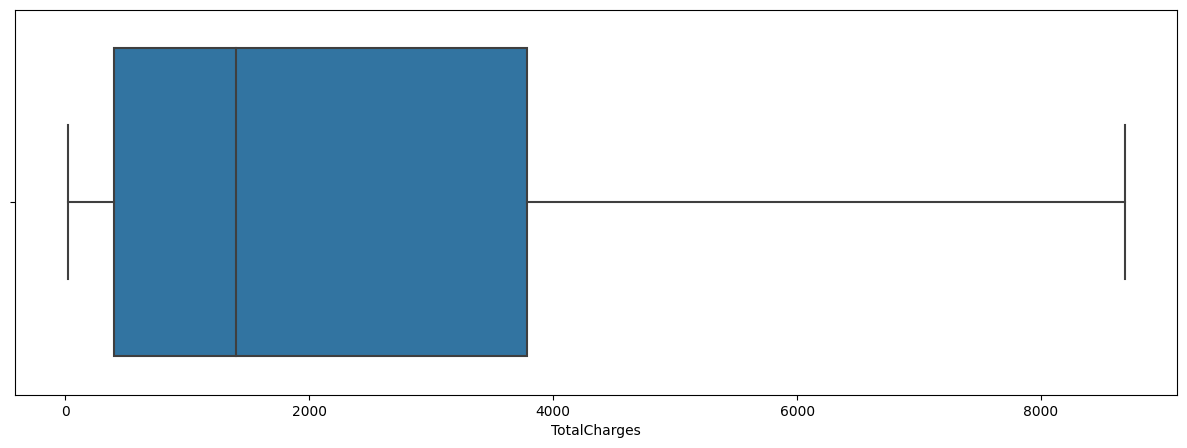

In [99]:
#checking outliers
plt.figure(figsize=(15,5))
sns.boxplot(x='TotalCharges',data=df)

<Axes: xlabel='MonthlyCharges'>

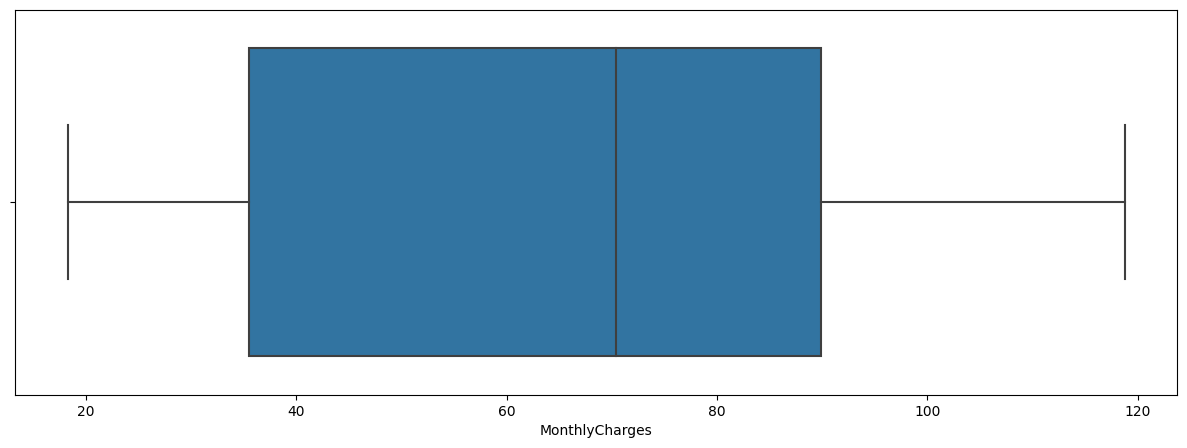

In [100]:
#checking outliers
plt.figure(figsize=(15,5))
sns.boxplot(x='MonthlyCharges',data=df)

<Axes: xlabel='tenure'>

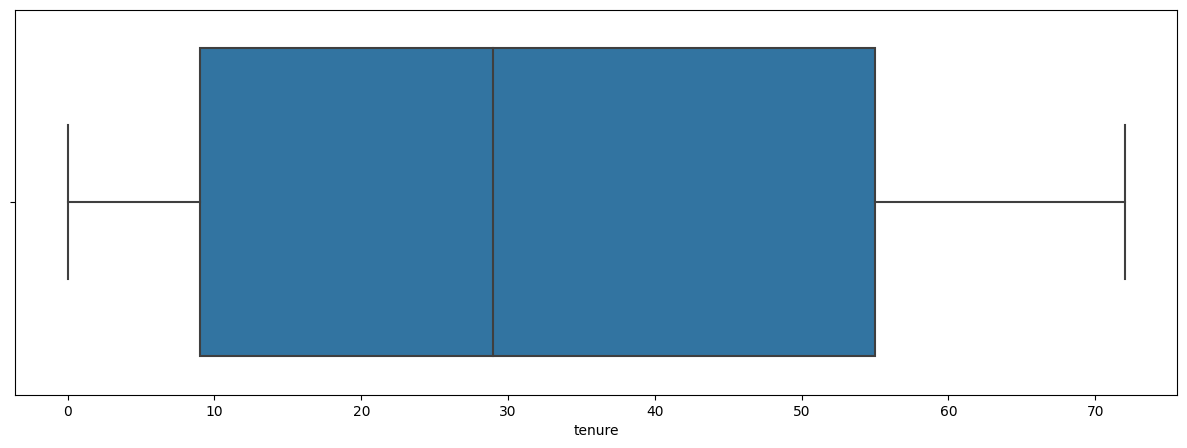

In [101]:
#checking outliers
plt.figure(figsize=(15,5))
sns.boxplot(x='tenure',data=df)      

In [102]:
#df corelation with the columns
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


<Axes: >

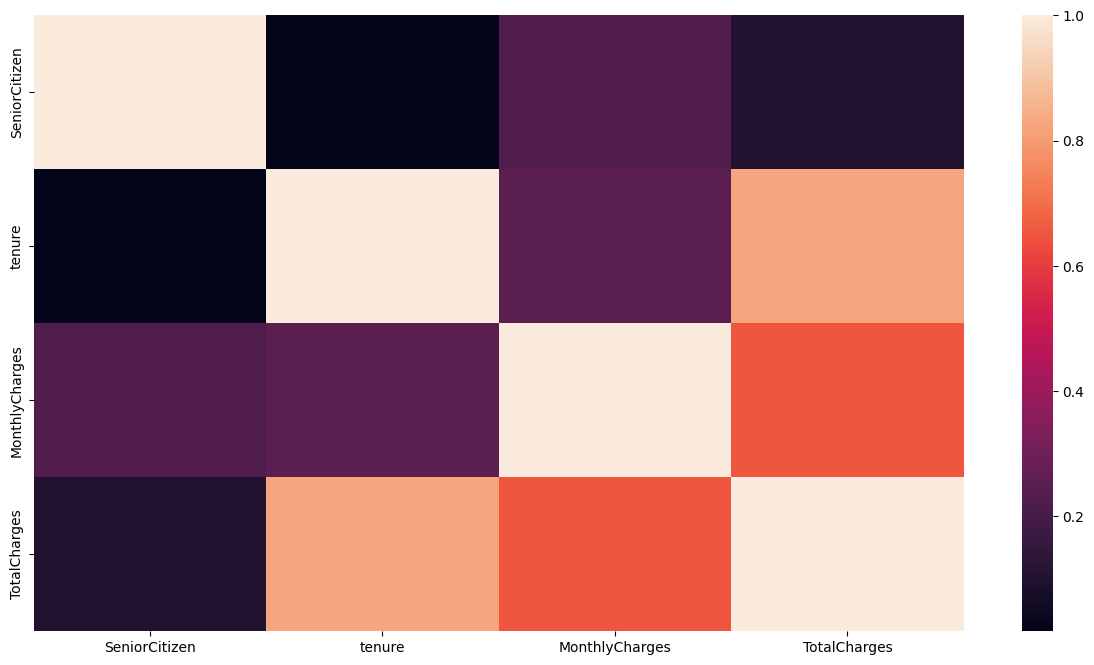

In [103]:
#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

<Figure size 1000x500 with 0 Axes>

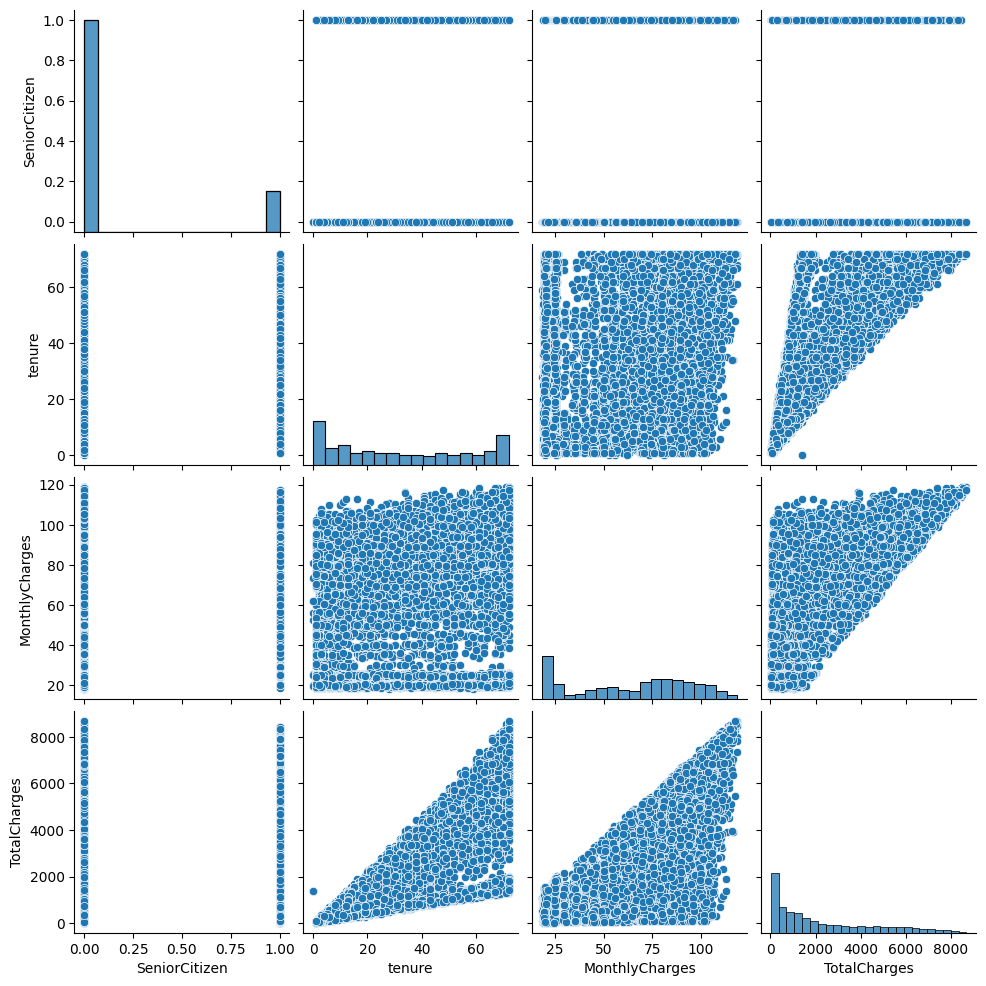

In [104]:
#pair plot
plt.figure(figsize=(10,5))
sns.pairplot(data=df)

<Axes: xlabel='Contract', ylabel='count'>

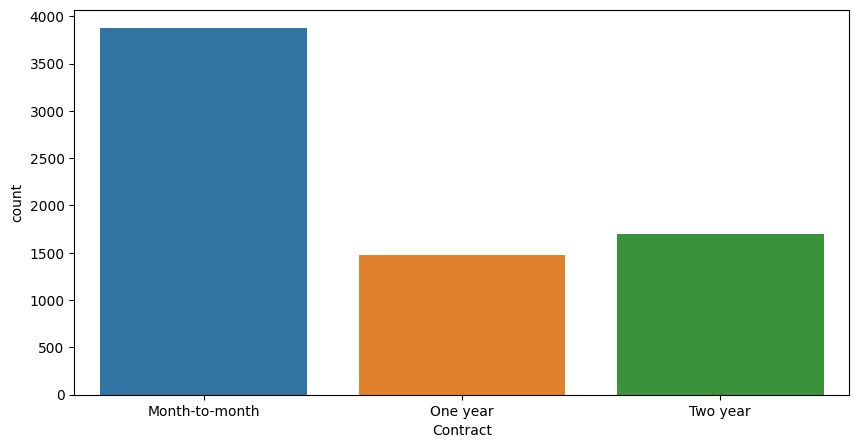

In [105]:
#countplot
plt.figure(figsize=(10,5))
sns.countplot(x = 'Contract', data=df)

<Axes: xlabel='Contract', ylabel='tenure'>

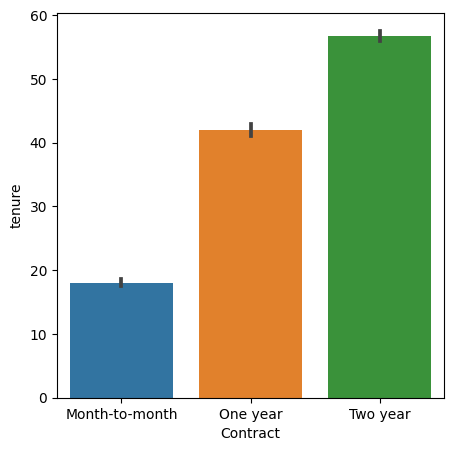

In [106]:
#countplot
plt.figure(figsize=(5,5))
sns.barplot(x='Contract',y='tenure',data=df)

<Axes: xlabel='gender', ylabel='tenure'>

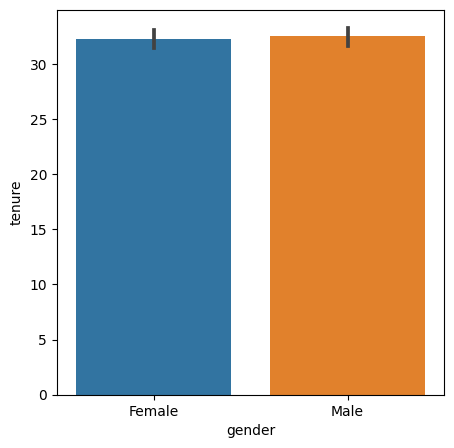

In [107]:
#countplot
plt.figure(figsize=(5,5))
sns.barplot(x='gender',y='tenure',data=df)

<Axes: xlabel='PaymentMethod', ylabel='count'>

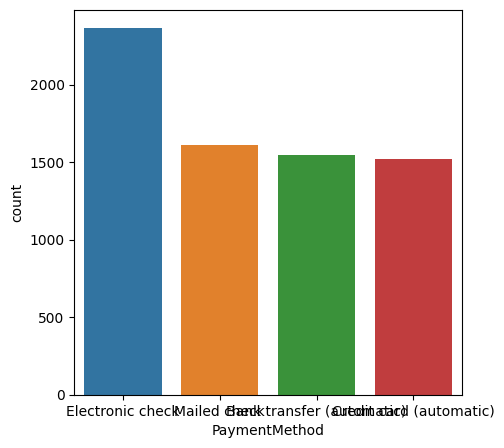

In [108]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(x = 'PaymentMethod', data=df)


<Axes: xlabel='Churn', ylabel='count'>

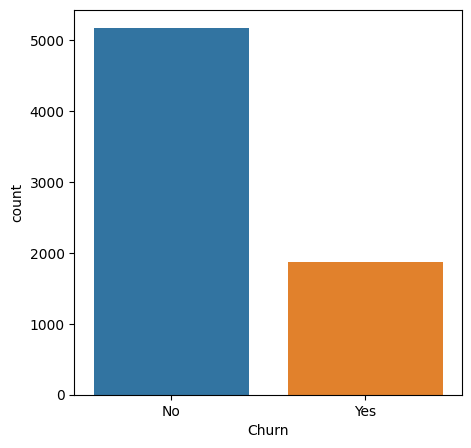

In [109]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(x = 'Churn', data=df)

<Axes: xlabel='gender', ylabel='count'>

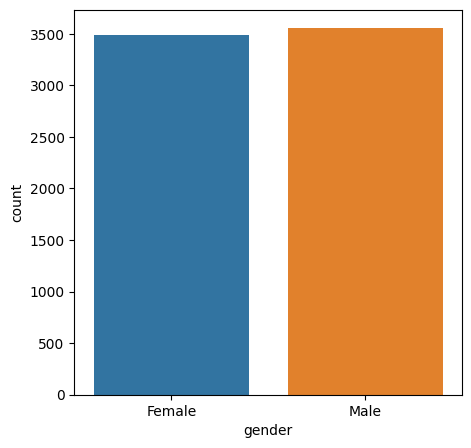

In [110]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(x = 'gender', data=df)

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

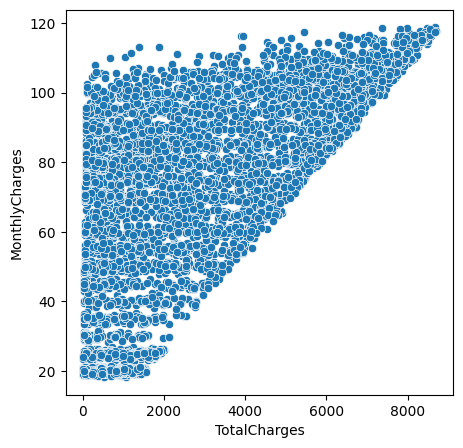

In [111]:
#scatterplot
plt.figure(figsize=(5,5))
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df)

In [112]:
# let's check unique values
columns=df.select_dtypes(include='O')
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'****','\n')

customerID :
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

 ******************************************************************************** 

gender :
 ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64

 ******************************************************************************** 

Partner :
 ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64

 ******************************************************************************** 

Dependents :
 ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64

 ******************************************************************************** 

PhoneService :
 ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64

 *********

In [113]:
#columns names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [114]:
#drop the columns
df=df.drop('customerID',axis=1)

In [115]:
#need to convert into numerical data
cat_data=['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [116]:
#labelencoding
le = LabelEncoder()
for col in cat_data:
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['No' 'Yes']


In [117]:
#converted categorical data into numerical data 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [118]:
#assign the churn into the y
x = df.drop(['Churn'], axis=1).values
y = df['Churn'].values

In [119]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state= 42)

In [120]:
#shapes
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (5634, 19)
X_test:  (1409, 19)
y_train: (5634,)
y_test:  (1409,)


In [121]:
#standardscaler 
ss_scaler = StandardScaler()
x_train = ss_scaler.fit_transform(X_train)
x_test = ss_scaler.fit_transform(X_test)

model building

In [122]:
#logisticregression
lr = LogisticRegression()
lr.fit(x_train , y_train)
print(lr.score(x_train , y_train))
print(lr.score(x_test , y_test))

0.8003194888178914
0.8147622427253371


In [123]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
print('Best hyperparameters:', grid.best_params_)
print('Best cross-validated score:', grid.best_score_)
best_lr = grid.best_estimator_
print('Test accuracy:', best_lr.score(x_test, y_test))


Best hyperparameters: {'C': 100}
Best cross-validated score: 0.7987219878298065
Test accuracy: 0.8140525195173882


In [127]:
#decision tree
model=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
model.score(x_test,y_test)

0.7963094393186657

In [128]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeClassifier(criterion="gini", random_state=100), 
                    param_grid, cv=5)
grid.fit(x_train, y_train)
print('Best hyperparameters:', grid.best_params_)
print('Best cross-validated score:', grid.best_score_)
best_dt = grid.best_estimator_
y_pred = best_dt.predict(x_test)
print('Test accuracy:', best_dt.score(x_test, y_test))


Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 2}
Best cross-validated score: 0.7841661400060835
Test accuracy: 0.7963094393186657


In [129]:
#classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [130]:
#smoteenn used to balance the data
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)


In [131]:
#split the data
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [149]:
#model 
model5=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [150]:
model5.fit(xr_train,yr_train)
yr_predict = model5.predict(xr_test)
model5= model5.score(xr_test, yr_test)
print(model5)


0.9333902647309992


In [147]:
#classification report
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       531
           1       0.94      0.94      0.94       640

    accuracy                           0.93      1171
   macro avg       0.93      0.93      0.93      1171
weighted avg       0.93      0.93      0.93      1171



test data

In [134]:
#test data
test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [135]:
#assign test data into df1
df1=test.copy()

In [136]:
# let's check unique values
columns1=df1.select_dtypes(include='O')
for col in columns1:
    print(col,':\n',df1[col].unique())
    print(df1[col].value_counts())
    print('\n',20*'****','\n')

gender :
 ['Male' 'Female']
Male      12
Female     8
Name: gender, dtype: int64

 ******************************************************************************** 

Partner :
 ['No' 'Yes']
No     13
Yes     7
Name: Partner, dtype: int64

 ******************************************************************************** 

Dependents :
 ['No' 'Yes']
No     17
Yes     3
Name: Dependents, dtype: int64

 ******************************************************************************** 

PhoneService :
 ['Yes' 'No']
Yes    14
No      6
Name: PhoneService, dtype: int64

 ******************************************************************************** 

MultipleLines :
 ['No' 'No phone service' 'Yes']
No                  9
No phone service    6
Yes                 5
Name: MultipleLines, dtype: int64

 ******************************************************************************** 

InternetService :
 ['Fiber optic' 'DSL' 'No']
DSL            10
Fiber optic     9
No              1
Name: Interne

In [137]:
#dataset columns
columns1.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [138]:
#need to convert into numerical data
cat_data1=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [139]:
#labelencoding
le = LabelEncoder()

for col in cat_data1:
    df1[col]=le.fit_transform(df1[col])
    print(le.classes_)

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes' 'no']
['No' 'No internet service' 'Yes' 'yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [140]:
#columns
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [141]:
#columns
desired_factor=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

predictions on test data

In [142]:
#logisticregression
model=LogisticRegression()

train_data=df[desired_factor]
test_data1=df1[desired_factor]
target=df.Churn
model.fit(train_data,target)
final=model.predict(test_data1)

output=pd.DataFrame(final)
output[0].value_counts()

0    16
1     4
Name: 0, dtype: int64

In [144]:
#decision tree
model=DecisionTreeClassifier(random_state=0)

train_data=df[desired_factor]
test_data1=df1[desired_factor]
target=df.Churn
model.fit(train_data,target)
final=model.predict(test_data1)

output=pd.DataFrame(final)
output[0].value_counts()

0    13
1     7
Name: 0, dtype: int64

In [145]:
#decision tree
model=DecisionTreeClassifier(random_state=1)
train_data=df[desired_factor]
test_data1=df1[desired_factor]
target=df.Churn
model.fit(train_data,target)
final=model.predict(test_data1)

output=pd.DataFrame(final)
output[0].value_counts()

0    13
1     7
Name: 0, dtype: int64

In [146]:
#decision tree
model=DecisionTreeClassifier(random_state=42)

train_data=df[desired_factor]
test_data1=df1[desired_factor]
target=df.Churn
model.fit(train_data,target)
final=model.predict(test_data1)

output=pd.DataFrame(final)
output[0].value_counts()

0    13
1     7
Name: 0, dtype: int64

pickle

In [151]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model5, pickle_out)
pickle_out.close()

submission csv


In [152]:
df1['churn']=final

In [153]:
df1.to_csv('submission.csv',index=False)